<a href="https://colab.research.google.com/github/ElhamHosseini73/LearnNLP/blob/master/NaturalLanguageProcessingSpecialization/ClassificationAndVectorSpaces/Week3%20/Manipulating_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#create word embedding for word
#1. preprocess word(just stemming )
#2. embed with bert

In [2]:
import nltk
from nltk.stem import PorterStemmer

# Instantiate stemming class
stemmer = PorterStemmer()

def stemming_word(word):
    stem_word = stemmer.stem(word)  # stemming word
    return stem_word


In [ ]:
#embedding
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

#load model
model = SentenceTransformer('sentence-transformers/LaBSE')

In [4]:
#inference
def inference_bert(text):
  embeddings = model.encode(text)
  return embeddings

In [5]:
import numpy as np
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

embed_words = []
for word in words:
  stem_word = stemming_word(word)
  embed_word = inference_bert(stem_word)
  embed_words.append(embed_word)

#It is important to note that we store each vector as a NumPy array. It allows us to use the linear algebra operations on it.
embed_word_matrix = np.matrix(embed_words)

In [6]:
print(embed_word_matrix[0,0])

-0.052678168


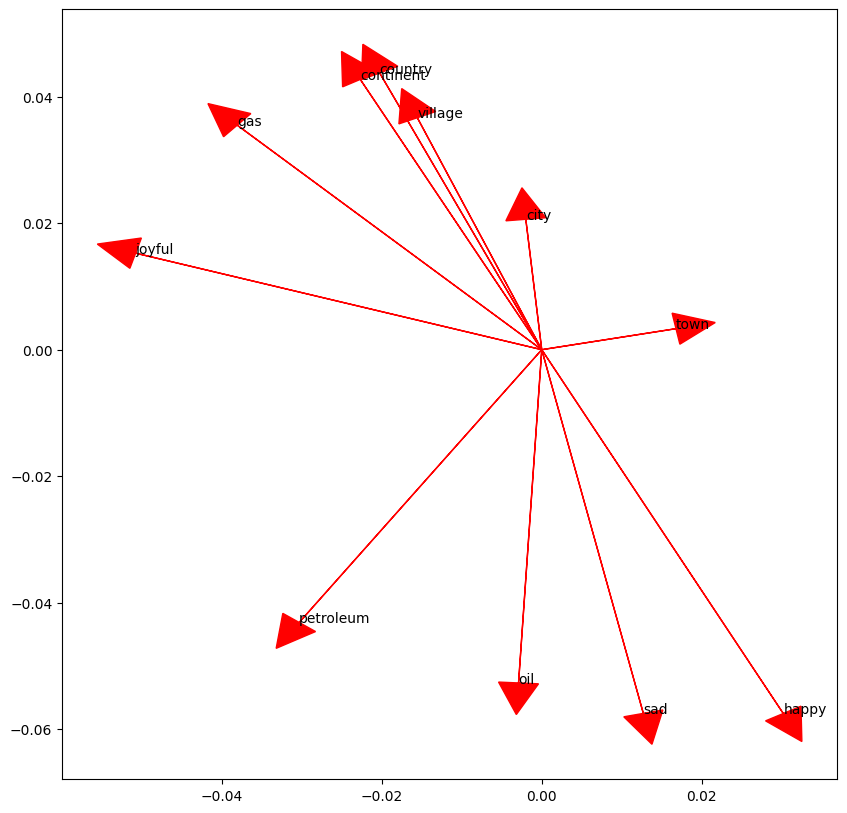

In [8]:
#plot
import matplotlib.pyplot as plt # Import matplotlib

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image


for index in range(len(words)):
  ax.arrow(0, 0, embed_word_matrix[index,1], embed_word_matrix[index,0], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
  ax.annotate(words[index], (embed_word_matrix[index,1], embed_word_matrix[index,0]))

plt.show()

In [ ]:
words = ['sad', 'happy', 'town', 'village']

list_embed_word = []
for word in words:
  stem_word = stemming_word(word)
  embed_word = inference_bert(stem_word)
  list_embed_word.append(embed_word)

matrix_embed_word = np.matrix(list_embed_word)

fig,ax = plt.subplots(figsize = (10, 10))

for index in range(len(words)):
  ax.arrow(0,0,matrix_embed_word[index,1], matrix_embed_word[index,0], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
  ax.annotate(words[index],(matrix_embed_word[index,1], matrix_embed_word[index,0]))


embed_village = matrix_embed_word[3,:]
embed_town = matrix_embed_word[2,:]
diff = embed_town - embed_village

ax.arrow(embed_town[])



In [ ]:
x , y =embed_village.shape
